**Background:** Everybody wants a puppy or a kitten, right? Approximately 6.5 million companion animals enter U.S. animal shelters nationwide every year. Of those, approximately 3.3 million are dogs and 3.2 million are cats.  We estimate that the number of dogs and cats entering U.S. shelters annually has declined from approximately 7.2 million in 2011.  The biggest decline was in dogs (from 3.9 million to 3.3 million).
info: https://www.aspca.org/animal-homelessness/shelter-intake-and-surrender/pet-statistics 

My aim is to look at average times animals spend in this center, and if age eefects the length of their stay.

**Data Source:** The dataset is downloaded from the web https://data.world/siyeh/austin-animal-center-live-data. The data contains over 126,000 rows10,127 records and 12 columns. The data updates dail so is constantly changing. My data is from 6/6/2021

**Objective:** Determine the length of time certain animals types, breed, and aged animal stay before they are adopted. 

**Hypothesis:**

Ho: μ1 = μ2
Ha: μ1 ≠ μ2

Observations: The findings from this analysis would create conversation with staff when it comes to marketing and promoting different types of animals. If cats and dogs and over one year of age stay longer before adoption, they may need to be marketed at a higher level.

**Methods:** Using Pandas - Data Visualization - Descriptive Statistics & Histogram - Hypothesis testing using two sample t-Test

**Loading Data to Colab Notebook**
Once the data was downloaded to my local machine, I inspected the data in Excel. I  thenuploaded the data to my Google drive and loaded it into to Colab using Python codes.

In [2]:
#connect google drive to Colab
from google.colab import drive #authorize google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#import numpy, panda, and math
import pandas as pd
import numpy as np
import math

In [4]:
#import for desc statistics
from sqlalchemy import create_engine
from scipy import stats

In [5]:
#import for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [6]:
#import from datetime
from datetime import datetime, timedelta

In [7]:
#import first df and check info
#intake_df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/AustinAnimalIntake.csv')
#intake_df.head()

In [8]:
#import second df and check info
#outcome_df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/AustinAnimalOutcome.csv')
#outcome_df.head()

In [9]:
#script to check the first date_in merges with first date_out, then moves on to next one if an animalas more than one visit
#takes about 32 minutes to run
#removes dogs with no date in or out
#intake_df = intake_df.sort_values(by=['date_in', 'time_in'])
#for index, row in intake_df.iterrows():
#    animal_id = row['animal_id']
#    date_in = row['date_in']
#    animal_outcome_df = outcome_df[(outcome_df['animal_id'] == animal_id) & (outcome_df['date_out'] >= date_in)].sort_values(by=['date_out', 'time_out'], ascending=True)
#    if len(animal_outcome_df) > 0:
#        next_outcome_for_animal = animal_outcome_df.iloc[0]
#        name = next_outcome_for_animal['name']
#        date_out = next_outcome_for_animal['date_out']
#        time_out = next_outcome_for_animal['time_out']
#        outcome_type = next_outcome_for_animal['outcome_type']
#        sex_upon_outcome = next_outcome_for_animal['sex_upon_outcome']
#        age_upon_outcome = next_outcome_for_animal['age_upon_outcome']
#        date_of_birth = next_outcome_for_animal['date_of_birth']
#        intake_df.at[index, 'name'] = name
#        intake_df.at[index, 'date_out'] = date_out
#        intake_df.at[index, 'time_out'] = time_out
#        intake_df.at[index, 'outcome_type'] = outcome_type
#        intake_df.at[index, 'sex_upon_outcome'] = sex_upon_outcome
#        intake_df.at[index, 'age_upon_outcome'] = age_upon_outcome
#        intake_df.at[index, 'date_of_birth'] = date_of_birth
#    else:
#        pass

In [10]:
#make new df usable
#df = intake_df.copy()

As it takes over 30 minutes to run the search, it quicker to save the df in a csv file to be able to load it up for future runs of the script.

In [11]:
#create csv
#df.to_csv('Mergeddf.csv')

In [12]:
#import first df and check info
df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/Mergeddf.csv')
df.head()

,Unnamed: 0,animal_id,name,date_in,time_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,date_out,time_out,outcome_type,sex_upon_outcome,age_upon_outcome,date_of_birth
0,839,A521520,Nina,2013-10-01,07:51:00,Norht Ec in Austin (TX),Stray,Normal,Dog,Spayed Female,7 years,Border Terrier/Border Collie,White/Tan,2013-10-01,15:39:00,Return to Owner,Spayed Female,7 years,9/7/2006
1,4970,A664235,NaN,2013-10-01,08:33:00,Abia in Austin (TX),Stray,Normal,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,2013-10-01,10:39:00,Transfer,Unknown,1 week,9/24/2013
2,4971,A664236,NaN,2013-10-01,08:33:00,Abia in Austin (TX),Stray,Normal,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,2013-10-01,10:44:00,Transfer,Unknown,1 week,9/24/2013
3,4972,A664237,NaN,2013-10-01,08:33:00,Abia in Austin (TX),Stray,Normal,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,2013-10-01,10:44:00,Transfer,Unknown,1 week,9/24/2013
4,4968,A664233,Stevie,2013-10-01,08:53:00,7405 Springtime in Austin (TX),Stray,Injured,Dog,Intact Female,3 years,Pit Bull Mix,Blue/White,2013-10-01,15:33:00,Euthanasia,Intact Female,3 years,9/30/2010


In [13]:
# Review the number of variables in the data
df.shape

(126962, 19)

In [14]:
# Review data types for the purpose of analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126962 entries, 0 to 126961
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        126962 non-null  int64 
 1   animal_id         126962 non-null  object
 2   name              87201 non-null   object
 3   date_in           126962 non-null  object
 4   time_in           126962 non-null  object
 5   found_location    126962 non-null  object
 6   intake_type       126962 non-null  object
 7   intake_condition  126962 non-null  object
 8   animal_type       126962 non-null  object
 9   sex_upon_intake   126961 non-null  object
 10  age_upon_intake   126962 non-null  object
 11  breed             126962 non-null  object
 12  color             126962 non-null  object
 13  date_out          126089 non-null  object
 14  time_out          126089 non-null  object
 15  outcome_type      126066 non-null  object
 16  sex_upon_outcome  126088 non-null  obj

In [15]:
# What is the distribution for Animal Type?
df['animal_type'].value_counts()

Dog          71803
Cat          47719
Other         6817
Bird           601
Livestock       22
Name: animal_type, dtype: int64

**Data Manipulation**
To further work with the data, I needed to change some data types, and create new columns. The  new columns will be the month of intake, plus the day of the week of intake. I created a new date of borth that has a datetime data type. The final three three columns will be, the animals present age, the animals age at adoption, and finally the days in the center before adoption takes place.

In [16]:
#changing date_in data type from object to datetime
df["date_in"] = pd.to_datetime(df["date_in"])
df["date_out"] = pd.to_datetime(df["date_out"])
df["date_in"]
df['date_out']

0        2013-10-01
1        2013-10-01
2        2013-10-01
3        2013-10-01
4        2013-10-01
            ...    
126957          NaT
126958   2021-06-06
126959   2021-06-06
126960          NaT
126961          NaT
Name: date_out, Length: 126962, dtype: datetime64[ns]

In [17]:
#extract month
df["date_in"].dt.month

0         10
1         10
2         10
3         10
4         10
          ..
126957     6
126958     6
126959     6
126960     6
126961     6
Name: date_in, Length: 126962, dtype: int64

In [18]:
#add month column
df["month"] = df["date_in"].dt.month

In [19]:
#extract day name of the year
df["date_in"].dt.day_name()

0         Tuesday
1         Tuesday
2         Tuesday
3         Tuesday
4         Tuesday
           ...   
126957     Sunday
126958     Sunday
126959     Sunday
126960     Sunday
126961     Sunday
Name: date_in, Length: 126962, dtype: object

In [20]:
#add the day name of the week column
df["dayofweek"] = df["date_in"].dt.day_name()

In [21]:
def get_age(x):
  age = (datetime.today() - (x)).days / 365
  return age

df['date_of_birth_dt'] = pd.to_datetime(df['date_of_birth'])

df['current_age'] = df['date_of_birth_dt'].apply(get_age)

In [22]:
#create an integer data type for age of adoption in a new column
adoption_age = df.date_out - df.date_of_birth_dt

In [23]:
adoption_age = adoption_age.dt.days

In [24]:
adoption_age = round(adoption_age/365.25 )

In [25]:
df['adoption_age'] = adoption_age

In [26]:
#create an integer data type for days before adoption in a new column
days_diff = df.date_out - df.date_in

In [27]:
days_diff = days_diff.dt.days

In [28]:
#days_diff = round(days_diff/365.25)

In [29]:
df['days_diff'] = days_diff

In [30]:
#create an integer data type for age at intake in a new column
age_intake = df.date_in - df.date_of_birth_dt

In [31]:
age_intake = age_intake.dt.days

In [32]:
df['age_intake'] = age_intake

In [33]:
#chcking that all data types are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126962 entries, 0 to 126961
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        126962 non-null  int64         
 1   animal_id         126962 non-null  object        
 2   name              87201 non-null   object        
 3   date_in           126962 non-null  datetime64[ns]
 4   time_in           126962 non-null  object        
 5   found_location    126962 non-null  object        
 6   intake_type       126962 non-null  object        
 7   intake_condition  126962 non-null  object        
 8   animal_type       126962 non-null  object        
 9   sex_upon_intake   126961 non-null  object        
 10  age_upon_intake   126962 non-null  object        
 11  breed             126962 non-null  object        
 12  color             126962 non-null  object        
 13  date_out          126089 non-null  datetime64[ns]
 14  time

In [34]:
df.head()

,Unnamed: 0,animal_id,name,date_in,time_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,date_out,time_out,outcome_type,sex_upon_outcome,age_upon_outcome,date_of_birth,month,dayofweek,date_of_birth_dt,current_age,adoption_age,days_diff,age_intake
0,839,A521520,Nina,2013-10-01,07:51:00,Norht Ec in Austin (TX),Stray,Normal,Dog,Spayed Female,7 years,Border Terrier/Border Collie,White/Tan,2013-10-01,15:39:00,Return to Owner,Spayed Female,7 years,9/7/2006,10,Tuesday,2006-09-07,14.778082,7.0,0.0,2581.0
1,4970,A664235,NaN,2013-10-01,08:33:00,Abia in Austin (TX),Stray,Normal,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,2013-10-01,10:39:00,Transfer,Unknown,1 week,9/24/2013,10,Tuesday,2013-09-24,7.726027,0.0,0.0,7.0
2,4971,A664236,NaN,2013-10-01,08:33:00,Abia in Austin (TX),Stray,Normal,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,2013-10-01,10:44:00,Transfer,Unknown,1 week,9/24/2013,10,Tuesday,2013-09-24,7.726027,0.0,0.0,7.0
3,4972,A664237,NaN,2013-10-01,08:33:00,Abia in Austin (TX),Stray,Normal,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,2013-10-01,10:44:00,Transfer,Unknown,1 week,9/24/2013,10,Tuesday,2013-09-24,7.726027,0.0,0.0,7.0
4,4968,A664233,Stevie,2013-10-01,08:53:00,7405 Springtime in Austin (TX),Stray,Injured,Dog,Intact Female,3 years,Pit Bull Mix,Blue/White,2013-10-01,15:33:00,Euthanasia,Intact Female,3 years,9/30/2010,10,Tuesday,2010-09-30,10.712329,3.0,0.0,1097.0


In [35]:
#what is the distribution for Age of Animal?
df['current_age'].value_counts()

7.153425     117
7.115068     117
5.789041     116
5.123288     115
6.156164     106
            ... 
14.364384      1
24.717808      1
20.928767      1
0.032877       1
15.249315      1
Name: current_age, Length: 7238, dtype: int64

In [36]:
#check max value in adoption_age column
df[df['adoption_age'] == df['adoption_age'].max()]

,Unnamed: 0,animal_id,name,date_in,time_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,date_out,time_out,outcome_type,sex_upon_outcome,age_upon_outcome,date_of_birth,month,dayofweek,date_of_birth_dt,current_age,adoption_age,days_diff,age_intake
58452,62452,A740127,Sweet Pea,2016-12-11,14:55:00,7709 Whitsun Dr in Austin (TX),Public Assist,Normal,Bird,Intact Female,25 years,Cockatoo,White/Orange,2016-12-16,00:00:00,Transfer,Intact Female,25 years,12/11/1991,12,Sunday,1991-12-11,29.528767,25.0,5.0,9132.0


**Adoptions Only**

I only wanted to look at adoptions, so I created a new database, and checked the data.
It reduced the rows by over 70,000.

In [37]:
adopt_df = df[(df.outcome_type == 'Adoption') & ((df.animal_type == 'Dog') | (df.animal_type == 'Cat'))]

In [38]:
#check max value in adoption_age column
df[df['days_diff'] == df['days_diff'].max()]

,Unnamed: 0,animal_id,name,date_in,time_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,date_out,time_out,outcome_type,sex_upon_outcome,age_upon_outcome,date_of_birth,month,dayofweek,date_of_birth_dt,current_age,adoption_age,days_diff,age_intake
41719,3631,A642712,Patches,2016-01-05,11:37:00,Crownover St And Caleb Dr in Austin (TX),Stray,Injured,Dog,Spayed Female,6 years,Pit Bull Mix,White/Gray Tiger,2021-04-01,10:08:00,Adoption,Spayed Female,11 years,11/28/2009,1,Tuesday,2009-11-28,11.550685,11.0,1913.0,2229.0


In [39]:
adopt_df['adoption_age'].describe()

count    55160.000000
mean         1.690011
std          2.542542
min         -1.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         19.000000
Name: adoption_age, dtype: float64

In [40]:
#check max value in adoption_age column
adopt_df[adopt_df['adoption_age'] == adopt_df['adoption_age'].min()]

,Unnamed: 0,animal_id,name,date_in,time_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,date_out,time_out,outcome_type,sex_upon_outcome,age_upon_outcome,date_of_birth,month,dayofweek,date_of_birth_dt,current_age,adoption_age,days_diff,age_intake
62135,65965,A745085,Keira,2017-03-12,14:19:00,10600 Winchelsea Ct in Austin (TX),Owner Surrender,Normal,Dog,Intact Female,0 years,Australian Cattle Dog Mix,White,2017-03-13,18:11:00,Adoption,Spayed Female,0 years,10/11/2017,3,Sunday,2017-10-11,3.676712,-1.0,1.0,-213.0
95389,97608,A788866,NaN,2019-02-10,12:47:00,7710 Blue Goose Road in Manor (TX),Stray,Normal,Dog,Intact Male,0 years,German Shepherd/Catahoula,Black Brindle,2019-02-15,12:02:00,Adoption,Neutered Male,0 years,12/6/2019,2,Sunday,2019-12-06,1.523288,-1.0,5.0,-299.0
95397,97616,A788874,NaN,2019-02-10,13:50:00,7300 Fm 2222 in Austin (TX),Stray,Normal,Dog,Intact Female,0 years,Labrador Retriever Mix,White/Tricolor,2019-02-14,17:13:00,Adoption,Spayed Female,0 years,12/6/2019,2,Sunday,2019-12-06,1.523288,-1.0,4.0,-299.0


In [41]:
#delete min value in days_diff column
adopt_df = adopt_df[adopt_df['adoption_age'] != adopt_df['adoption_age'].min()]

In [42]:
#check max value in adoption_age column
adopt_df[adopt_df['adoption_age'] == adopt_df['adoption_age'].max()]

,Unnamed: 0,animal_id,name,date_in,time_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,date_out,time_out,outcome_type,sex_upon_outcome,age_upon_outcome,date_of_birth,month,dayofweek,date_of_birth_dt,current_age,adoption_age,days_diff,age_intake
89235,91872,A780834,Sierra,2018-09-20,17:11:00,Travis (TX),Owner Surrender,Normal,Cat,Spayed Female,19 years,Domestic Medium Hair Mix,White/Brown Tabby,2018-09-30,13:04:00,Adoption,Spayed Female,19 years,9/20/1999,9,Thursday,1999-09-20,21.747945,19.0,10.0,6940.0


After checking the Max length of time I noticed several dates had DOB, and present dates that didn't add up to the correct age. These rows were deleted.

In [43]:
#delete max value in days_diff column
adopt_df = adopt_df[adopt_df['days_diff'] != adopt_df['days_diff'].max()]

In [44]:
#delete max value in days_diff column
adopt_df = adopt_df[adopt_df['days_diff'] != adopt_df['days_diff'].max()]

In [45]:
#delete max value in days_diff column
adopt_df = adopt_df[adopt_df['days_diff'] != adopt_df['days_diff'].max()]

In [46]:
#check head of df
adopt_df.head()

,Unnamed: 0,animal_id,name,date_in,time_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,date_out,time_out,outcome_type,sex_upon_outcome,age_upon_outcome,date_of_birth,month,dayofweek,date_of_birth_dt,current_age,adoption_age,days_diff,age_intake
8,4979,A664257,Pippin,2013-10-01,11:01:00,Burleson in Travis (TX),Stray,Normal,Dog,Intact Female,4 years,Podengo Pequeno Mix,Black,2013-10-24,13:31:00,Adoption,Spayed Female,4 years,10/1/2009,10,Tuesday,2009-10-01,11.709589,4.0,23.0,1461.0
14,4139,A651630,Heather,2013-10-01,11:23:00,Outside Jurisdiction,Owner Surrender,Injured,Dog,Spayed Female,6 years,Labrador Retriever/Chinese Sharpei,Tan,2013-12-31,15:13:00,Adoption,Spayed Female,6 years,4/13/2007,10,Tuesday,2007-04-13,14.180822,7.0,91.0,2363.0
16,4991,A664269,*Bismark,2013-10-01,11:28:00,7500 S Ih 35 in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Great Pyrenees Mix,White,2013-10-19,15:40:00,Adoption,Neutered Male,2 years,10/1/2011,10,Tuesday,2011-10-01,9.709589,2.0,18.0,731.0
19,4986,A664264,*Mason,2013-10-01,11:51:00,4915 Yager Ln in Austin (TX),Stray,Normal,Cat,Intact Male,2 months,Domestic Shorthair Mix,Brown Tabby,2013-10-14,12:25:00,Adoption,Neutered Male,2 months,7/17/2013,10,Tuesday,2013-07-17,7.915068,0.0,13.0,76.0
20,4987,A664265,*Dixon,2013-10-01,11:51:00,4915 Yager Ln in Austin (TX),Stray,Normal,Cat,Intact Male,2 months,Domestic Shorthair Mix,Brown Tabby,2013-10-12,18:20:00,Adoption,Neutered Male,2 months,7/17/2013,10,Tuesday,2013-07-17,7.915068,0.0,11.0,76.0


In [47]:
#check shape
adopt_df.shape

(55154, 26)

In [48]:
#checking the number of unique animals
adopt_df['animal_id'].nunique()

49808

**Statistics**
I created a statistics series to look at the newly created days_diff column that lists the number of days between intake and adoptions.

In [49]:
#create stat series
def series_statistics(column): #create a function to display statistics
  print('Statistics for column: {}'.format(column.name))
  print('The max value in the column: {}'.format(column.max()))
  print('The min value in the column: {}'.format(column.min()))
  print('The mode value in the column: {}'.format(column.mode()))
  print('The median value in the column: {}'.format(column.median()))
  print('The mean of the column: {}'.format(column.mean()))
  print('The std of the column: {}'.format(column.std()))

In [50]:
#run stat series
series_statistics(adopt_df['days_diff']) #statistics for days_diff column

Statistics for column: days_diff
The max value in the column: 1408.0
The min value in the column: 0.0
The mode value in the column: 0    4.0
dtype: float64
The median value in the column: 11.0
The mean of the column: 32.805236247597634
The std of the column: 58.167407059193835


We see the total number of cats and dogs in new dataframe.
We then see a visualations of the number of cats and dogs by age.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


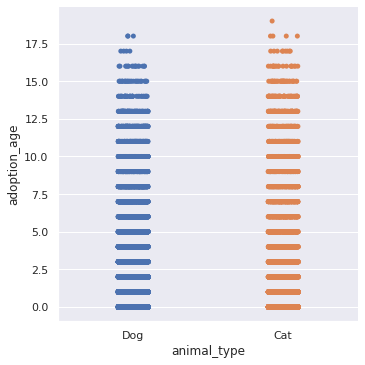

In [51]:
#the length of time cats and dogs stay in center before adoption by age
sns.catplot("animal_type", "adoption_age", data = adopt_df.query("animal_type == 'Dog' | animal_type == 'Cat'"))

In [52]:
# What is the distribution for Animal Type?
adopt_df['animal_type'].value_counts()

Dog    33705
Cat    21449
Name: animal_type, dtype: int64

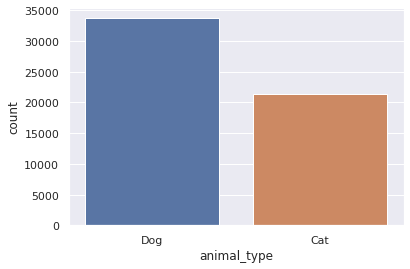

In [53]:
sns.countplot(x='animal_type', data = adopt_df.query("animal_type == 'Dog' | animal_type == 'Cat'"))

**T-Tests**
The null hypothese state:
1. There is no significant difference with the length of time cats and dogs are in the center before adoption
2. There is no significant difference with the length of time the a animal one or under one, and animals over one stay in center before adoption
3. There is no significant difference with the length of time that a cat one or under one, and animals over one stay in center before adoption
4. There is no significant difference with the length of time that a dog one or under one, and animals over one stay in center before adoption
5. There is no significant difference with the length of time that a cat one or younger stays in the center before adoption in realtion to a dog of the same age
6, There is no significant difference with the length of time that a cat over one stays in the center before adoption in realtion to a dog of the same age

In [54]:
#create a df for dogs in animal_type column
dogs_out = adopt_df[(adopt_df['animal_type'] == 'Dog')]

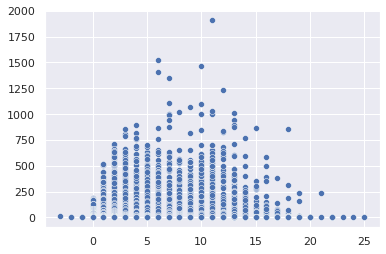

In [55]:
#days in center by age for dogs
sns.scatterplot(x=adoption_age, y=days_diff, data=adopt_df.query("animal_type == 'Dog'"))

In [56]:
#create a df for cats in animal_type column
cats_out = adopt_df[(adopt_df['animal_type'] == 'Cat')]

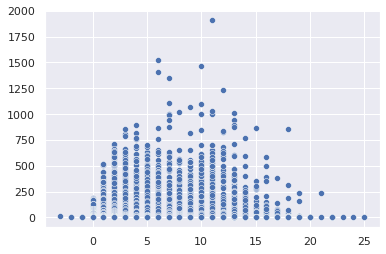

In [57]:
#days in center by age for cats
sns.scatterplot(x=adoption_age, y=days_diff, data=adopt_df.query("animal_type == 'Cat'"))

In [58]:
#1. is there a significant difference in in the length of time cats and dogs stay in the center before adoption?
stats.ttest_ind(cats_out['days_diff'], dogs_out['days_diff'])

Ttest_indResult(statistic=25.275372366536146, pvalue=3.7587519771308136e-140)

In [59]:
# Is the p-value less than 0.05?
3.289956148642502e-140 < 0.05

True

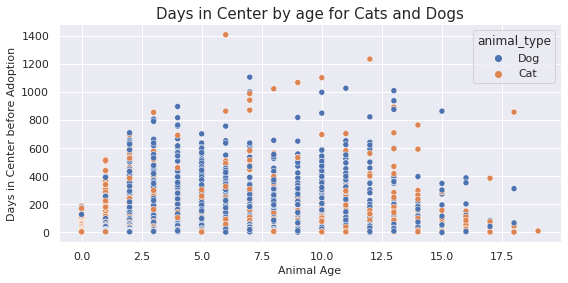

In [60]:
#days in Center by Age for Cats and Dogs
plt.figure(figsize=(9, 4))
plt.title('Days in Center by age for Cats and Dogs', size=15)
plt.xlabel('Animal Age', size=11)
plt.ylabel('Days in Center before Adoption', size=11)
color = ['steelblue', 'orange']
sns.scatterplot(x="adoption_age", y="days_diff", hue= "animal_type", data=adopt_df)
sns.despine();

**Conclusion**

Reject the null hypothesis where p-value < 0.05, and conclude there is a significant difference in the length of time cats and dogs stay in the center before adoption

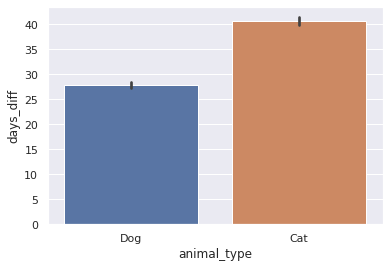

In [61]:
sns.barplot(x='animal_type', y='days_diff', data = adopt_df.query("animal_type == 'Dog' | animal_type == 'Cat'"))

In [62]:
#create a df for animals under 1 year from age_upon_intake column
underone_out = adopt_df[(adopt_df['age_intake'] <= 1)]

In [63]:
#create a df for animals over 1 year from age_upon_intake column
overone_out = adopt_df[(adopt_df['age_intake'] > 1)]

In [64]:
#2. is there a significant difference in in the length of time animals under the age of one,
    #and animals over the age of one stay in the center before adoption?
stats.ttest_ind(underone_out['days_diff'], overone_out['days_diff'])

Ttest_indResult(statistic=16.809841327866913, pvalue=2.972699784275414e-63)

In [65]:
# Is the p-value less than 0.05?
2.972699784275414e-63 < 0.05

True

**Conclusion**

Reject the null hypothesis where p-value < 0.05, and conclude there is significant difference in the length of time animals under the age of one, and animals over the age of one stay in the center before adoption.

We have looked at animal type and age separately, now we will combine them to see if the age of cats and dogs effect the length of time in the center.

In [66]:
#create a df for cats one year of age or younger
youngcat_out = adopt_df[(adopt_df['animal_type'] == 'Cat') & (adopt_df['days_diff'] <= 1)]

In [67]:
#create a df for cats one year of age or younger
oldcat_out = adopt_df[(adopt_df['animal_type'] == 'Cat') & (adopt_df['days_diff'] > 1)]

In [68]:
#3. is there a significant difference in in the length of time cats under the age of one,
    #and cats over the age of one stay in the center before adoption?
stats.ttest_ind(oldcat_out['days_diff'], youngcat_out['days_diff'])

Ttest_indResult(statistic=13.394992787337102, pvalue=9.433309308562241e-41)

In [69]:
# Is the p-value less than 0.05?
9.433309308562241e-41 < 0.05

True

**Conclusion**

Reject the null hypothesis where p-value < 0.05, and conclude there is a significant difference in the length of time cats under the age of one, and cats over the age of one stay in the center before adoption.

In [70]:
#create a df for dogs one year of age or younger
youngdog_out = adopt_df[(adopt_df['animal_type'] == 'Dog') & (adopt_df['days_diff'] <= 1)]

In [71]:
#create a df for dogs over the age of one
olddog_out = adopt_df[(adopt_df['animal_type'] == 'Dog') & (adopt_df['days_diff'] > 1)]

In [72]:
#4. is there a significant difference in in the length of time dogs under the age of one,
    #and animals over the age of one stay in the center before adoption?
stats.ttest_ind(olddog_out['days_diff'], youngdog_out['days_diff'])

Ttest_indResult(statistic=18.14377000676182, pvalue=3.2120254006022734e-73)

In [73]:
# Is the p-value less than 0.05?
2.911775799834916e-73 < 0.05

True

**Conclusion**

Reject the null hypothesis where p-value < 0.05, and conclude there is a significant difference in the length of time dogs under the age of one, and dogs over the age of one stay in the center before adoption.

In [74]:
#5. is there a significant difference in in the length of time cats under the age of one,
    #and cats under the of one stay in the center before adoption?
stats.ttest_ind(youngcat_out['days_diff'], youngdog_out['days_diff'])

Ttest_indResult(statistic=2.4523002203940587, pvalue=0.014287835686122016)

In [75]:
# Is the p-value less than 0.05?
0.014601137136287329 < 0.05

True

**Conclusion**

Reject the null hypothesis where p-value < 0.05, and conclude there is a significant difference in the length of time cats under the age of one, and dogs under the age of one stay in the center before adoption.

In [76]:
#6. is there a significant difference in in the length of time cats over the age of one,
    #and dogs over the age of one stay in the center before adoption?
stats.ttest_ind(oldcat_out['days_diff'], olddog_out['days_diff'])

Ttest_indResult(statistic=23.432040606579584, pvalue=8.244816930995973e-121)

In [77]:
# Is the p-value less than 0.05?
7.5836310996966865e-121 < 0.05

True

**Conclusion**

Reject the null hypothesis where p-value < 0.05, and conclude there is a significant difference in the length of time cats over the age of one, and dogs over the age of one stay in the center before adoption.

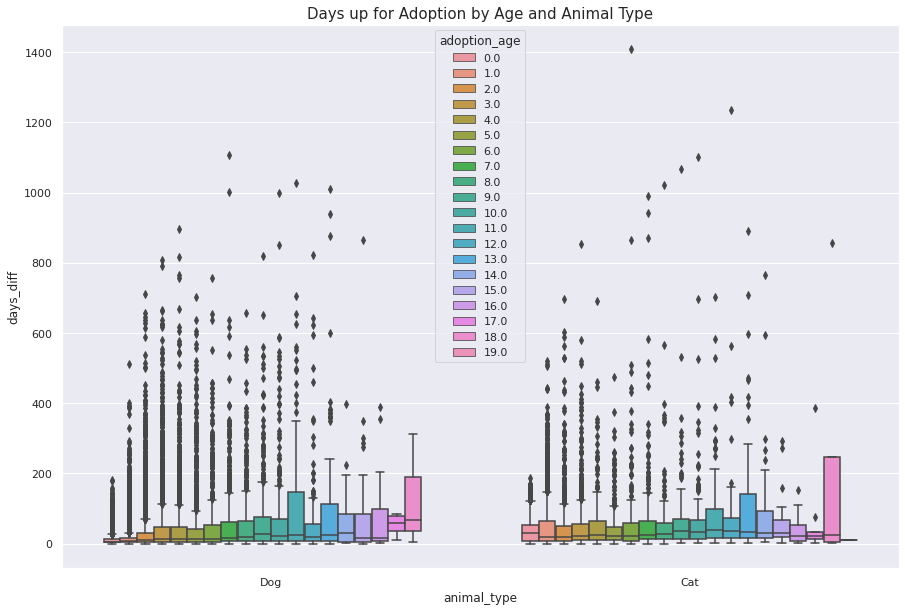

In [78]:
plt.figure(figsize=(15, 10))
plt.title('Days up for Adoption by Age and Animal Type', size=15)
sns.boxplot(y="days_diff", x="animal_type", hue="adoption_age", data=adopt_df)

**Conclusion**

Cats stay in the center longer than dogs do before adoption



**Results**

The age of the dog does effect the length of time before adoption

Puppies (18 months or younger) have a greater chance to be adopted than dogs

The age of a cat doesn't greatly effect the length of time it is adoption

**Recommedations**



*   Promote older dogs over puppies on regular basis

*   Have cat adoption specials more often than dogs


*   Do further analysis on animal breed and adoption length

*   Do further anaysis on animal breed and age combined



In [79]:
#create csv
adopt_df.to_csv('Adoptdf.csv')